<a href="https://colab.research.google.com/github/noor-prabh/bearing-fault-detection/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv
Saving dataset2.csv to dataset2.csv


In [ ]:
import pandas as pd

df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')

In [ ]:
print(df1.head())

            Unnamed: 0  Bearing 1  Bearing 2  Bearing 3  Bearing 4
0  2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
1  2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2  2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
3  2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
4  2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118


In [ ]:
print(df2.head())

            Unnamed: 0  Bearing 1  Bearing 2  Bearing 3  Bearing 4
0  2004-03-04 09:27:46   0.061630   0.075278   0.051991   0.043475
1  2004-03-04 09:32:46   0.060774   0.072206   0.052239   0.042039
2  2004-03-04 09:42:46   0.062195   0.072886   0.054809   0.041360
3  2004-03-04 09:52:46   0.062994   0.073433   0.054261   0.043126
4  2004-03-04 10:02:46   0.061945   0.073006   0.053237   0.042617


# **EDA**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Missing values in dataset 1")
print(df1.isnull().sum())

Missing values in dataset 1
Unnamed: 0    0
Bearing 1     0
Bearing 2     0
Bearing 3     0
Bearing 4     0
dtype: int64


In [ ]:
print("Missing values in dataset 2")
print(df2.isnull().sum())

Missing values in dataset 2
Unnamed: 0    0
Bearing 1     0
Bearing 2     0
Bearing 3     0
Bearing 4     0
dtype: int64


In [ ]:
print("Summary statistics of dataset1")
print(df1.describe())

Summary statistics of dataset1
        Bearing 1   Bearing 2   Bearing 3   Bearing 4
count  984.000000  984.000000  984.000000  984.000000
mean     0.080905    0.078532    0.081356    0.047822
std      0.040171    0.011779    0.011596    0.009541
min      0.001168    0.000767    0.000716    0.001699
25%      0.060765    0.074233    0.076832    0.043950
50%      0.062007    0.075203    0.078197    0.044524
75%      0.083223    0.077456    0.080600    0.048111
max      0.453335    0.161016    0.151299    0.119047


In [ ]:
print("Summary statistics of dataset1")
print(df2.describe())

Summary statistics of dataset1
         Bearing 1    Bearing 2    Bearing 3    Bearing 4
count  6324.000000  6324.000000  6324.000000  6324.000000
mean      0.058445     0.064602     0.057390     0.044168
std       0.005061     0.009270     0.023149     0.011082
min       0.001533     0.002441     0.003663     0.001428
25%       0.056456     0.061598     0.052594     0.040506
50%       0.057655     0.062777     0.053938     0.043425
75%       0.059216     0.064786     0.055308     0.044281
max       0.122483     0.224439     0.543770     0.244897


In [ ]:
df1.rename(columns={df1.columns[0]: "Timestamp"}, inplace=True)
df2.rename(columns={df2.columns[0]: "Timestamp"}, inplace=True)

In [ ]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])
df2["Timestamp"] = pd.to_datetime(df2["Timestamp"])

In [ ]:
df1.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)
df2.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

# **VISUALIZING RAW DATASET 1**

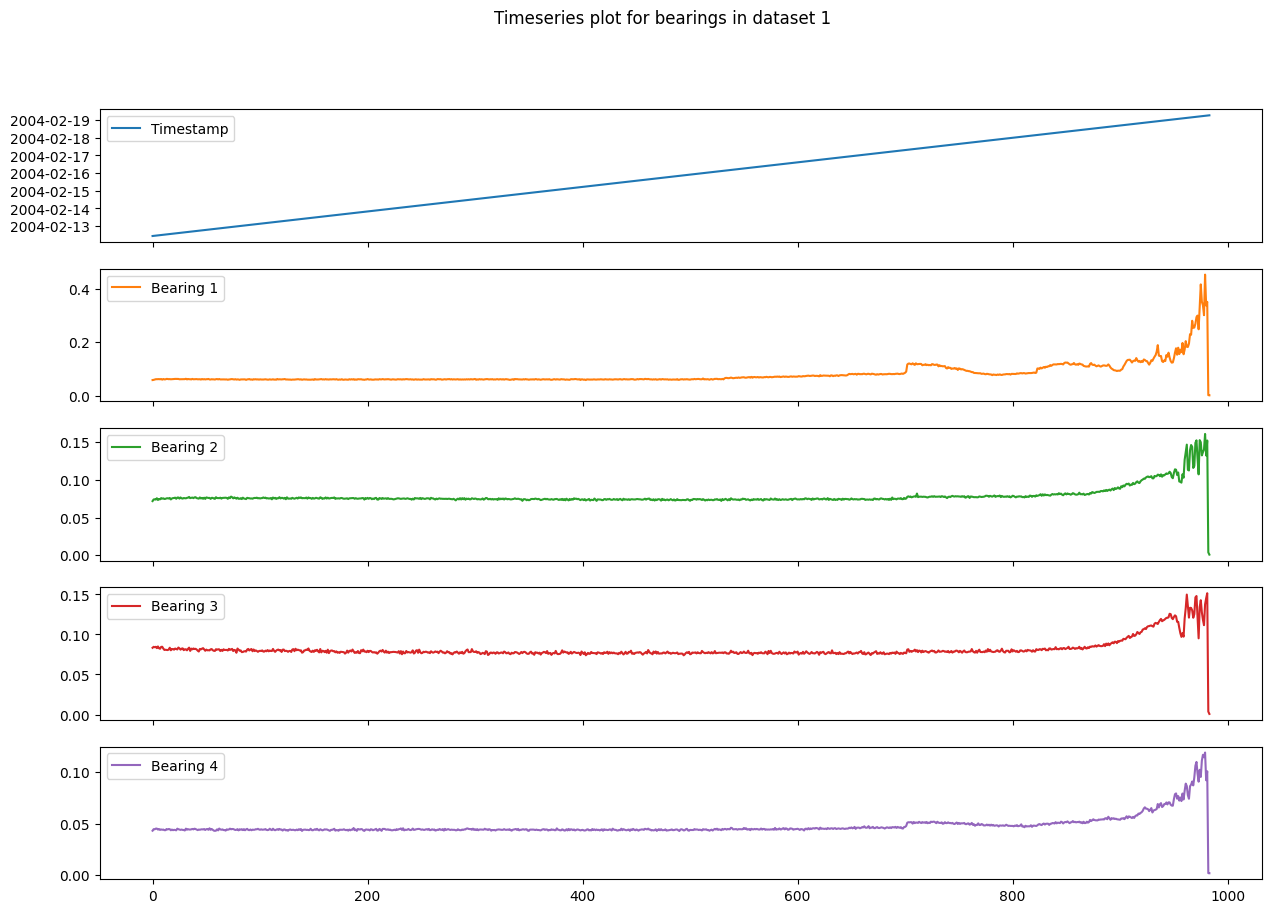

In [ ]:
df1.plot(subplots=True, figsize=(15,10))
plt.suptitle('Timeseries plot for bearings in dataset 1')
plt.show()

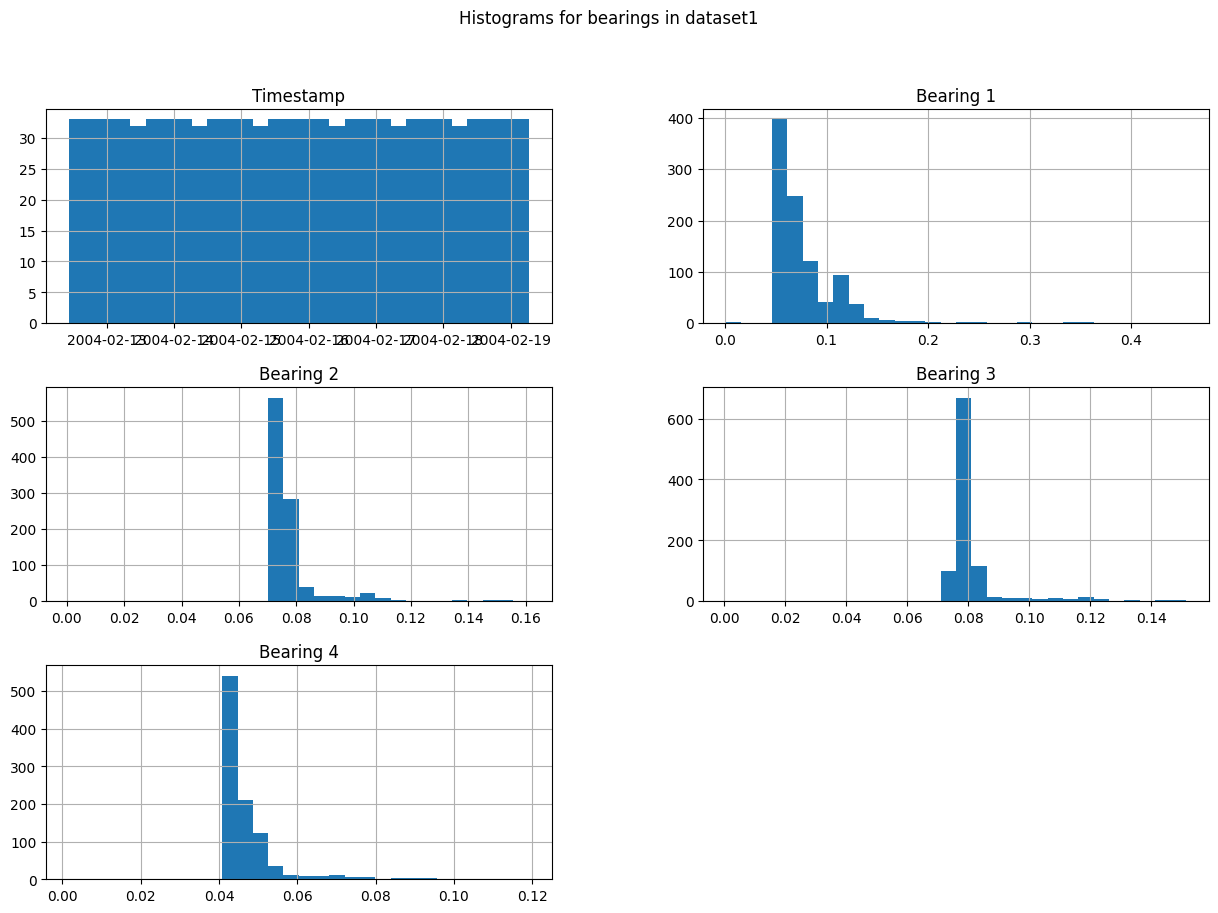

In [ ]:
df1.hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms for bearings in dataset1')
plt.show()

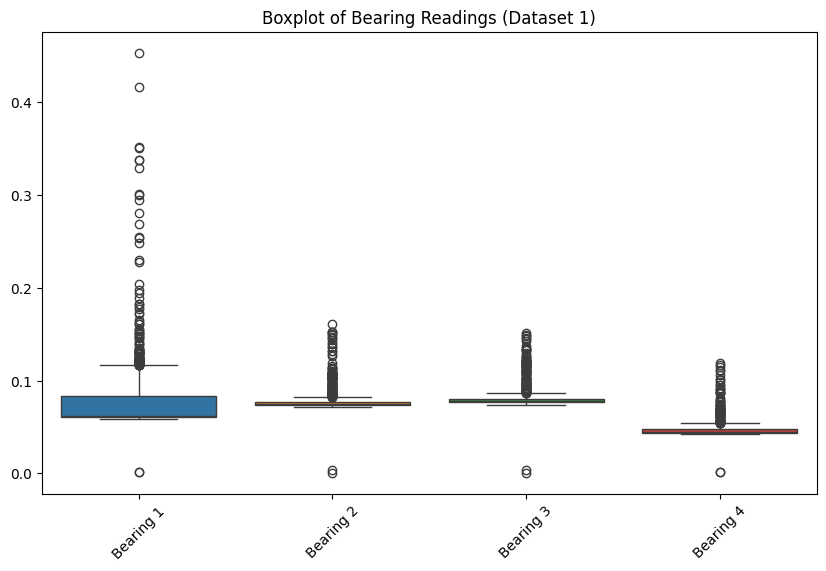

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title("Boxplot of Bearing Readings (Dataset 1)")
plt.xticks(rotation=45)
plt.show()

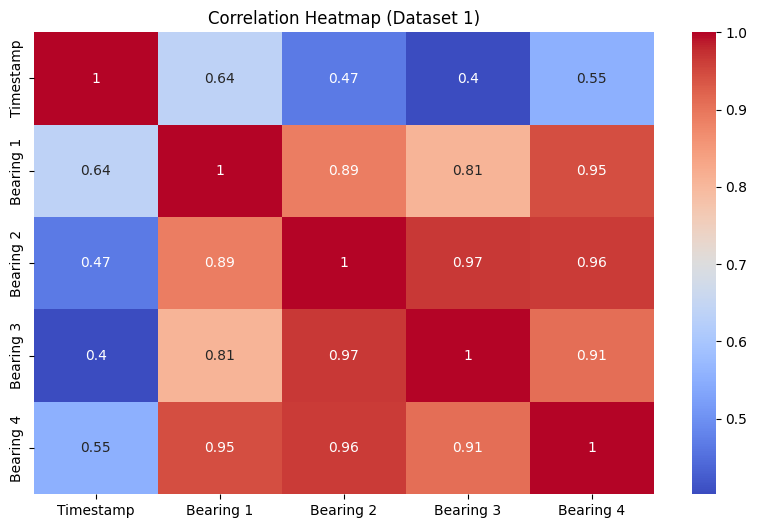

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Dataset 1)')
plt.show()

# **RAW DATA VISUALIZATION DATASET 2**

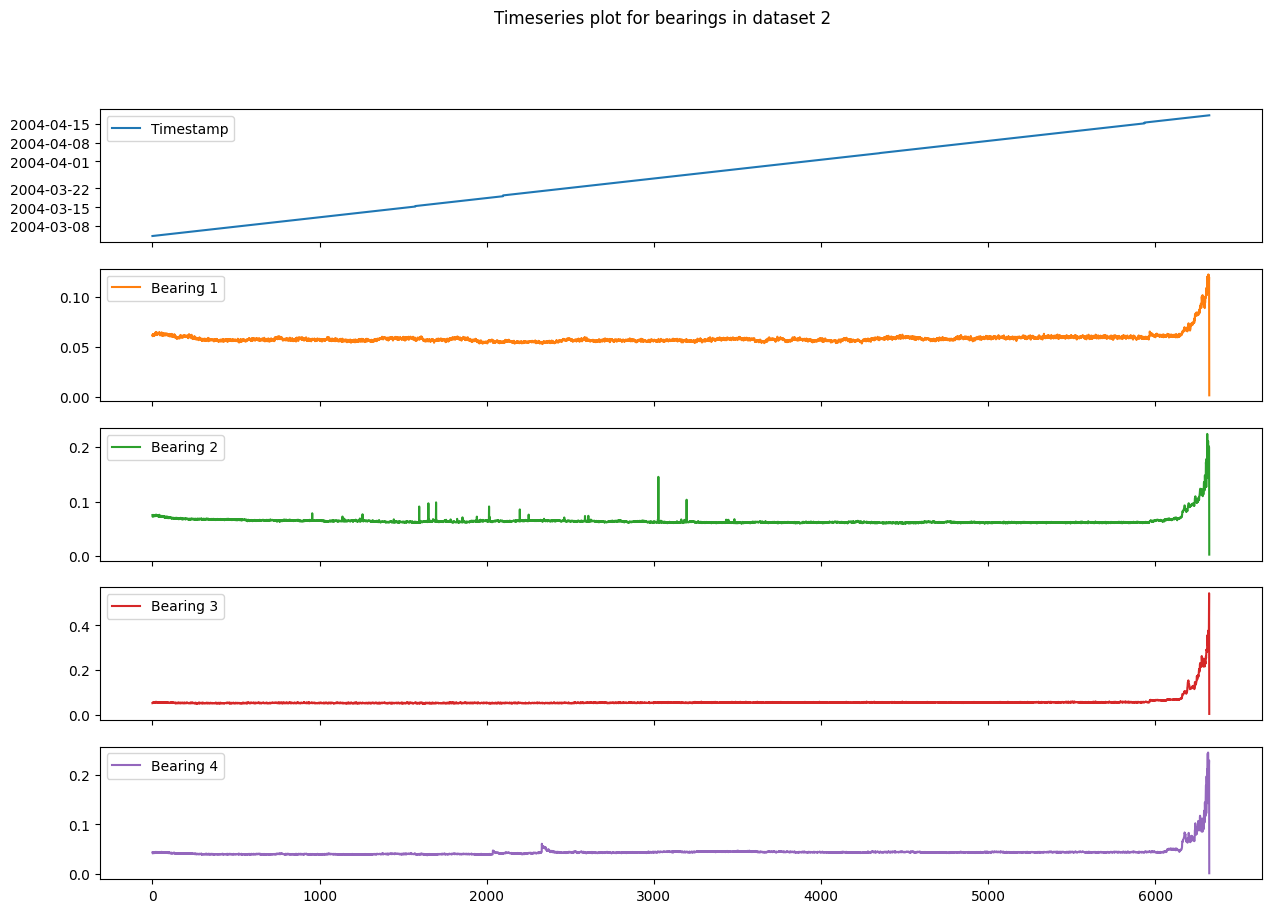

In [ ]:
df2.plot(subplots=True, figsize=(15,10))
plt.suptitle('Timeseries plot for bearings in dataset 2')
plt.show()

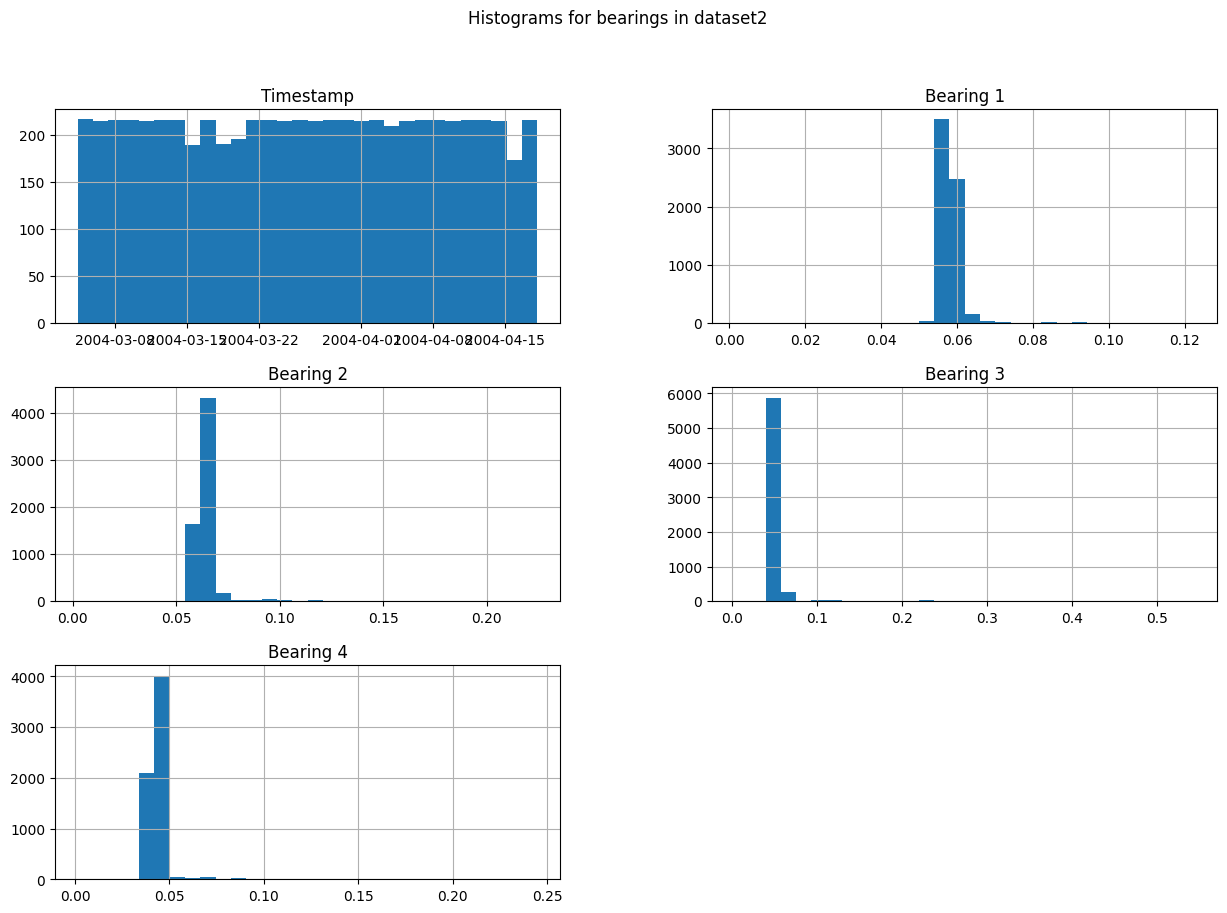

In [ ]:
df2.hist(bins=30, figsize=(15,10))
plt.suptitle('Histograms for bearings in dataset2')
plt.show()

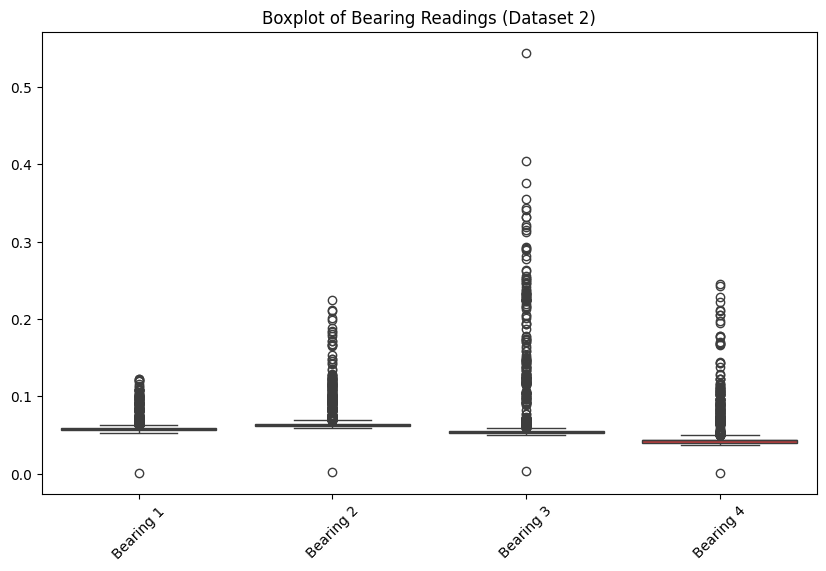

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2)
plt.title("Boxplot of Bearing Readings (Dataset 2)")
plt.xticks(rotation=45)
plt.show()

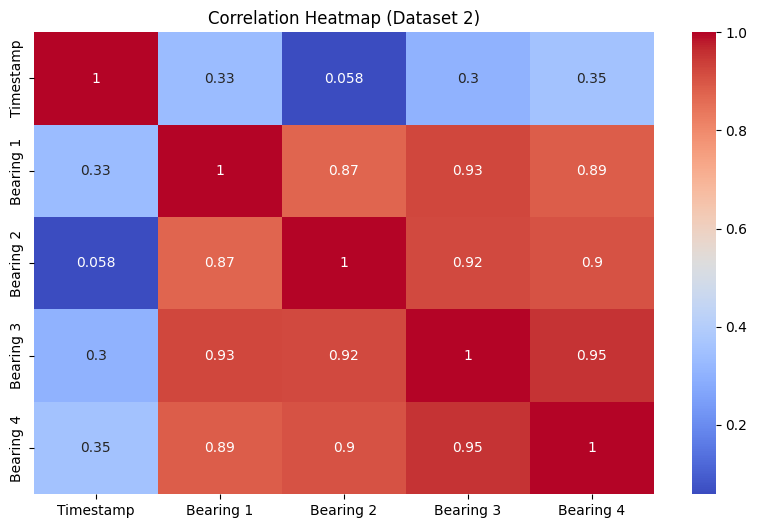

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Dataset 2)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
bearing_cols = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
combined_data = pd.concat([df1[bearing_cols], df2[bearing_cols]], axis=0)
scaler = MinMaxScaler()
scaler.fit(combined_data)
df1[bearing_cols] = scaler.transform(df1[bearing_cols])
df2[bearing_cols] = scaler.transform(df2[bearing_cols])

In [ ]:
print(df1.head())

            Timestamp  Bearing 1  Bearing 2  Bearing 3  Bearing 4
0 2004-02-12 10:32:39   0.126423   0.317718   0.151966   0.171023
1 2004-02-12 10:42:39   0.127888   0.327438   0.154164   0.177079
2 2004-02-12 10:52:39   0.130633   0.328426   0.153226   0.176677
3 2004-02-12 11:02:39   0.133329   0.326715   0.154204   0.179299
4 2004-02-12 11:12:39   0.133120   0.334605   0.151220   0.179450


# **FEATURE ENGINEERING**

In [ ]:
#STATISTICAL FEATURES
window_size = 50

for col in bearing_cols:
    df1[f'{col}_mean'] = df1[col].rolling(window=window_size).mean()
    df1[f'{col}_std'] = df1[col].rolling(window=window_size).std()
    df1[f'{col}_min'] = df1[col].rolling(window=window_size).min()
    df1[f'{col}_max'] = df1[col].rolling(window=window_size).max()
    df1[f'{col}_skew'] = df1[col].rolling(window=window_size).skew()
    df1[f'{col}_kurt'] = df1[col].rolling(window=window_size).kurt()

    df2[f'{col}_mean'] = df2[col].rolling(window=window_size).mean()
    df2[f'{col}_std'] = df2[col].rolling(window=window_size).std()
    df2[f'{col}_min'] = df2[col].rolling(window=window_size).min()
    df2[f'{col}_max'] = df2[col].rolling(window=window_size).max()
    df2[f'{col}_skew'] = df2[col].rolling(window=window_size).skew()
    df2[f'{col}_kurt'] = df2[col].rolling(window=window_size).kurt()

In [ ]:
#ROLLING WINDOW FEATURES
for col in bearing_cols:
    df1[f'{col}_rolling_mean'] = df1[col].rolling(window=window_size).mean()
    df1[f'{col}_rolling_std'] = df1[col].rolling(window=window_size).std()
    df1[f'{col}_rolling_min'] = df1[col].rolling(window=window_size).min()
    df1[f'{col}_rolling_max'] = df1[col].rolling(window=window_size).max()

    df2[f'{col}_rolling_mean'] = df2[col].rolling(window=window_size).mean()
    df2[f'{col}_rolling_std'] = df2[col].rolling(window=window_size).std()
    df2[f'{col}_rolling_min'] = df2[col].rolling(window=window_size).min()
    df2[f'{col}_rolling_max'] = df2[col].rolling(window=window_size).max()

In [ ]:
#LAG FEATURES
lag = 1
for col in bearing_cols:
    df1[f'{col}_lag{lag}'] = df1[col].shift(lag)
    df2[f'{col}_lag{lag}'] = df2[col].shift(lag)

In [ ]:
#FOURIER TRANSFORM
from numpy.fft import fft

def fft_transform(column):
    return np.abs(fft(column))

for col in bearing_cols:
    df1[f'{col}_fft'] = fft_transform(df1[col])
    df2[f'{col}_fft'] = fft_transform(df2[col])

In [ ]:
#EMA
span = 20
for col in bearing_cols:
    df1[f'{col}_ema'] = df1[col].ewm(span=span).mean()
    df2[f'{col}_ema'] = df2[col].ewm(span=span).mean()

In [ ]:
#CHANGE RATE
for col in bearing_cols:
    df1[f'{col}_change_rate'] = df1[col].diff()
    df2[f'{col}_change_rate'] = df2[col].diff()

In [ ]:
#ROOT MEAN SQUARED ERROR
for col in bearing_cols:
    df1[f'{col}_rms'] = np.sqrt(np.mean(np.square(df1[col])))
    df2[f'{col}_rms'] = np.sqrt(np.mean(np.square(df2[col])))


In [ ]:
#AGGREGATE FEATURES
df1['mean_bearings'] = df1[bearing_cols].mean(axis=1)
df2['mean_bearings'] = df2[bearing_cols].mean(axis=1)
df1['std_bearings'] = df1[bearing_cols].std(axis=1)
df2['std_bearings'] = df2[bearing_cols].std(axis=1)


In [ ]:
df1.head()

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 1_mean,Bearing 1_std,Bearing 1_min,Bearing 1_max,Bearing 1_skew,...,Bearing 1_change_rate,Bearing 2_change_rate,Bearing 3_change_rate,Bearing 4_change_rate,Bearing 1_rms,Bearing 2_rms,Bearing 3_rms,Bearing 4_rms,mean_bearings,std_bearings
0,2004-02-12 10:32:39,0.126423,0.317718,0.151966,0.171023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.197439,0.351635,0.150019,0.194539,0.191783,0.085922
1,2004-02-12 10:42:39,0.127888,0.327438,0.154164,0.177079,NaN,NaN,NaN,NaN,NaN,...,0.001465,0.009720,0.002198,0.006056,0.197439,0.351635,0.150019,0.194539,0.196642,0.089483
2,2004-02-12 10:52:39,0.130633,0.328426,0.153226,0.176677,NaN,NaN,NaN,NaN,NaN,...,0.002745,0.000988,-0.000938,-0.000402,0.197439,0.351635,0.150019,0.194539,0.197240,0.089454
3,2004-02-12 11:02:39,0.133329,0.326715,0.154204,0.179299,NaN,NaN,NaN,NaN,NaN,...,0.002696,-0.001710,0.000978,0.002622,0.197439,0.351635,0.150019,0.194539,0.198387,0.087592
4,2004-02-12 11:12:39,0.133120,0.334605,0.151220,0.179450,NaN,NaN,NaN,NaN,NaN,...,-0.000209,0.007890,-0.002984,0.000152,0.197439,0.351635,0.150019,0.194539,0.199599,0.092001


In [ ]:
df2.head()

,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 1_mean,Bearing 1_std,Bearing 1_min,Bearing 1_max,Bearing 1_skew,...,Bearing 1_change_rate,Bearing 2_change_rate,Bearing 3_change_rate,Bearing 4_change_rate,Bearing 1_rms,Bearing 2_rms,Bearing 3_rms,Bearing 4_rms,mean_bearings,std_bearings
0,2004-03-04 09:27:46,0.133715,0.333128,0.094419,0.172699,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.127166,0.288388,0.11273,0.181352,0.183490,0.104752
1,2004-03-04 09:32:46,0.131822,0.319391,0.094876,0.166804,NaN,NaN,NaN,NaN,NaN,...,-0.001893,-0.013737,0.000456,-0.005895,0.127166,0.288388,0.11273,0.181352,0.178223,0.098588
2,2004-03-04 09:42:46,0.134964,0.322430,0.099609,0.164013,NaN,NaN,NaN,NaN,NaN,...,0.003142,0.003039,0.004734,-0.002791,0.127166,0.288388,0.11273,0.181352,0.180254,0.098374
3,2004-03-04 09:52:46,0.136733,0.324879,0.098600,0.171269,NaN,NaN,NaN,NaN,NaN,...,0.001768,0.002449,-0.001010,0.007256,0.127166,0.288388,0.11273,0.181352,0.182870,0.099216
4,2004-03-04 10:02:46,0.134413,0.322969,0.096713,0.169177,NaN,NaN,NaN,NaN,NaN,...,-0.002320,-0.001910,-0.001887,-0.002092,0.127166,0.288388,0.11273,0.181352,0.180818,0.099280


In [ ]:
from sklearn.impute import SimpleImputer
numerical_columns = ['Bearing 1_mean', 'Bearing 1_std', 'Bearing 1_min', 'Bearing 1_max',
       'Bearing 1_skew', 'Bearing 1_kurt', 'Bearing 2_mean', 'Bearing 2_std',
       'Bearing 2_min', 'Bearing 2_max', 'Bearing 2_skew', 'Bearing 2_kurt',
       'Bearing 3_mean', 'Bearing 3_std', 'Bearing 3_min', 'Bearing 3_max',
       'Bearing 3_skew', 'Bearing 3_kurt', 'Bearing 4_mean', 'Bearing 4_std',
       'Bearing 4_min', 'Bearing 4_max', 'Bearing 4_skew', 'Bearing 4_kurt',
       'Bearing 1_rolling_mean', 'Bearing 1_rolling_std',
       'Bearing 1_rolling_min', 'Bearing 1_rolling_max',
       'Bearing 2_rolling_mean', 'Bearing 2_rolling_std',
       'Bearing 2_rolling_min', 'Bearing 2_rolling_max',
       'Bearing 3_rolling_mean', 'Bearing 3_rolling_std',
       'Bearing 3_rolling_min', 'Bearing 3_rolling_max',
       'Bearing 4_rolling_mean', 'Bearing 4_rolling_std',
       'Bearing 4_rolling_min', 'Bearing 4_rolling_max', 'Bearing 1_lag1',
       'Bearing 2_lag1', 'Bearing 3_lag1', 'Bearing 4_lag1', 'Bearing 1_fft',
       'Bearing 2_fft', 'Bearing 3_fft', 'Bearing 4_fft', 'Bearing 1_ema',
       'Bearing 2_ema', 'Bearing 3_ema', 'Bearing 4_ema',
       'Bearing 1_change_rate', 'Bearing 2_change_rate',
       'Bearing 3_change_rate', 'Bearing 4_change_rate', 'Bearing 1_rms',
       'Bearing 2_rms', 'Bearing 3_rms', 'Bearing 4_rms', 'mean_bearings',
       'std_bearings']
num_imputer = SimpleImputer(strategy='mean')
df1[numerical_columns] = num_imputer.fit_transform(df1[numerical_columns])

df2[numerical_columns] = num_imputer.fit_transform(df2[numerical_columns])


,Timestamp,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 1_mean,Bearing 1_std,Bearing 1_min,Bearing 1_max,Bearing 1_skew,...,Bearing 1_change_rate,Bearing 2_change_rate,Bearing 3_change_rate,Bearing 4_change_rate,Bearing 1_rms,Bearing 2_rms,Bearing 3_rms,Bearing 4_rms,mean_bearings,std_bearings
0,2004-02-12 10:32:39,0.126423,0.317718,0.151966,0.171023,0.168673,0.011259,0.150953,0.193931,0.057232,...,-0.000129,-0.000323,-0.000155,-0.000173,0.197439,0.351635,0.150019,0.194539,0.191783,0.085922
1,2004-02-12 10:42:39,0.127888,0.327438,0.154164,0.177079,0.168673,0.011259,0.150953,0.193931,0.057232,...,0.001465,0.009720,0.002198,0.006056,0.197439,0.351635,0.150019,0.194539,0.196642,0.089483
2,2004-02-12 10:52:39,0.130633,0.328426,0.153226,0.176677,0.168673,0.011259,0.150953,0.193931,0.057232,...,0.002745,0.000988,-0.000938,-0.000402,0.197439,0.351635,0.150019,0.194539,0.197240,0.089454
3,2004-02-12 11:02:39,0.133329,0.326715,0.154204,0.179299,0.168673,0.011259,0.150953,0.193931,0.057232,...,0.002696,-0.001710,0.000978,0.002622,0.197439,0.351635,0.150019,0.194539,0.198387,0.087592
4,2004-02-12 11:12:39,0.133120,0.334605,0.151220,0.179450,0.168673,0.011259,0.150953,0.193931,0.057232,...,-0.000209,0.007890,-0.002984,0.000152,0.197439,0.351635,0.150019,0.194539,0.199599,0.092001
